# Data set:
The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [141]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import zscore
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [142]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv",low_memory=False)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Analysis and Data Preprocessing

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [144]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [145]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [146]:
df.shape

(1025, 14)

In [147]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [148]:
print(df.nunique())
print(df.head())

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [149]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


# ML_Classification

In [150]:
X = df.drop('target', axis=1)
y = df['target']

In [151]:
# Splitting X and y into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [152]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ML Models:

Logistic Regression

Naive Bayes

Random Forest Classifier

Extreme Gradient Boost

K_Nearest Neighbour

Decision Tree

Support Vector Machine

In [153]:
# 1. Logistic Regression
lr = LogisticRegression(C=10, fit_intercept=False)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("--- Logistic Regression ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- Logistic Regression ---
Confusion Matrix:
 [[32  8]
 [ 6 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.79      0.83      0.81        36

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76

Specificity: 0.8




In [154]:
# 2. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("--- Naive Bayes ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))
cm = confusion_matrix(y_test, nb_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Spécificité : Vrai Négatif / (Vrai Négatif + Faux Positif)
print("Specificity:", specificity)
print("Accuracy Score:", accuracy_score(y_test, nb_pred) * 100)
print("\n")


--- Naive Bayes ---
Confusion Matrix:
 [[32  8]
 [ 5 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        40
           1       0.79      0.86      0.83        36

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76

Specificity: 0.8
Accuracy Score: 82.89473684210526




In [155]:
# 3. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("--- Random Forest ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
cm = confusion_matrix(y_test, rf_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  
print("Specificity:", specificity)
print("Accuracy Score:", accuracy_score(y_test, rf_pred) * 100)
print("\n")

--- Random Forest ---
Confusion Matrix:
 [[29 11]
 [ 3 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.81        40
           1       0.75      0.92      0.82        36

    accuracy                           0.82        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.82      0.81        76

Specificity: 0.725
Accuracy Score: 81.57894736842105




In [156]:
# 4. Extreme Gradient Boost
xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=25,
    max_depth=15,
    gamma=0.6,
    subsample=0.52,
    colsample_bytree=0.6,
    seed=27,
    reg_lambda=2,
    booster='dart',
    colsample_bylevel=0.6,
    colsample_bynode=0.5
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("--- Extreme Gradient Boost ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

cm = confusion_matrix(y_test, xgb_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Spécificité : Vrai Négatif / (Vrai Négatif + Faux Positif)
print("Specificity:", specificity)
print("Accuracy Score:", accuracy_score(y_test, xgb_pred) * 100)
print("\n")


--- Extreme Gradient Boost ---
Confusion Matrix:
 [[29 11]
 [ 4 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        40
           1       0.74      0.89      0.81        36

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.82      0.80      0.80        76

Specificity: 0.725
Accuracy Score: 80.26315789473685




In [157]:
# 5. K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("--- K-Neighbors Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

cm = confusion_matrix(y_test, knn_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Spécificité : Vrai Négatif / (Vrai Négatif + Faux Positif)
print("Specificity:", specificity)
print("Accuracy Score:", accuracy_score(y_test, knn_pred) * 100)
print("\n")

--- K-Neighbors Classifier ---
Confusion Matrix:
 [[29 11]
 [ 5 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78        40
           1       0.74      0.86      0.79        36

    accuracy                           0.79        76
   macro avg       0.80      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76

Specificity: 0.725
Accuracy Score: 78.94736842105263




In [158]:
# 6. Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=6)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("--- Decision Tree Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

cm = confusion_matrix(y_test, dt_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Spécificité : Vrai Négatif / (Vrai Négatif + Faux Positif)
print("Specificity:", specificity)

print("Accuracy Score:", accuracy_score(y_test, dt_pred) * 100)
print("\n")

--- Decision Tree Classifier ---
Confusion Matrix:
 [[31  9]
 [ 9 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        40
           1       0.75      0.75      0.75        36

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76

Specificity: 0.775
Accuracy Score: 76.31578947368422




In [159]:
# 7. Support Vector Classifier
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print("--- Support Vector Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_pred))
print("Classification Report:\n", classification_report(y_test, svc_pred))

cm = confusion_matrix(y_test, svc_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Spécificité : Vrai Négatif / (Vrai Négatif + Faux Positif)
print("Specificity:", specificity)

print("Accuracy Score:", accuracy_score(y_test, svc_pred) * 100)
print("\n")

--- Support Vector Classifier ---
Confusion Matrix:
 [[31  9]
 [ 8 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.76      0.78      0.77        36

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76

Specificity: 0.775
Accuracy Score: 77.63157894736842




In [160]:
%matplotlib inline

# XGB Feature Importance

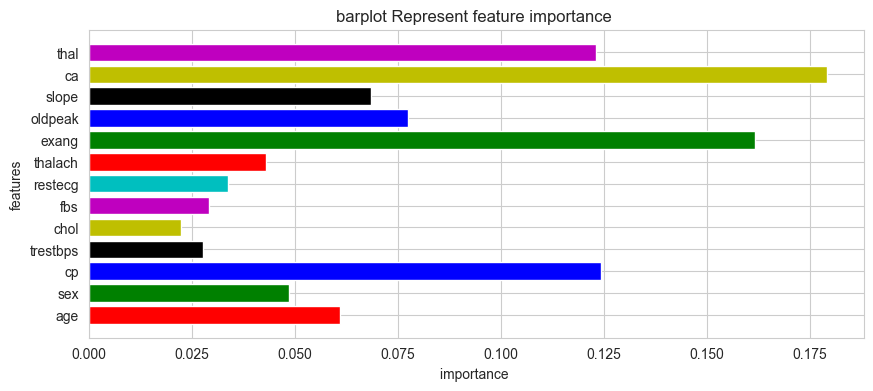

In [161]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})

plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = list('rgbkymc'))
plt.show()

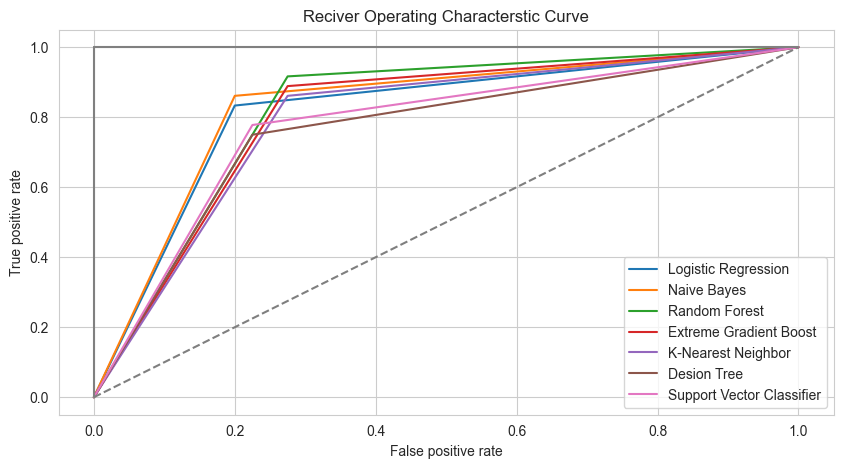

In [162]:
import seaborn as sns
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,y_pred_lr)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_pred)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_pred)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_pred)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_pred)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_pred)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Model Evaluation

In [163]:
from sklearn.metrics import f1_score
# Evaluation Table
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Extreme Gradient Boost','K-Neighbors','Decision Tree','Support Vector Classifier']
Accuracy_scores = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred ),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, svc_pred)
]

f1_scores = [
    f1_score(y_test, y_pred_lr, average='weighted'),
    f1_score(y_test, nb_pred, average='weighted'),
    f1_score(y_test, rf_pred, average='weighted'),
    f1_score(y_test, xgb_pred , average='weighted'),
    f1_score(y_test, knn_pred, average='weighted'),
    f1_score(y_test, dt_pred, average='weighted'),
    f1_score(y_test, svc_pred, average='weighted')
]


results = pd.DataFrame({
    'Model': models,
    'Accuracy_score': Accuracy_scores,
    'f1_score': f1_scores,
    
})

print("Evaluation Table:")
results.set_index('Model')

Evaluation Table:


,Accuracy_score,f1_score
Model,,
Logistic Regression,0.815789,0.815917
Naive Bayes,0.828947,0.829036
Random Forest,0.815789,0.814766
Extreme Gradient Boost,0.802632,0.801913
K-Neighbors,0.789474,0.789036
Decision Tree,0.763158,0.763158
Support Vector Classifier,0.776316,0.776432


Recommendations

. Naive Bayes appears to be the top-performing model on this dataset. If you’re looking for a simple and fast model with strong accuracy, it is an excellent choice.

. If interpretability is important, Logistic Regression might be preferred due to its good balance of performance and simplicity.

. XGBoost could be further optimized if resources allow, especially for complex data, by adjusting hyperparameters such as n_estimators, max_depth, and learning_rate.

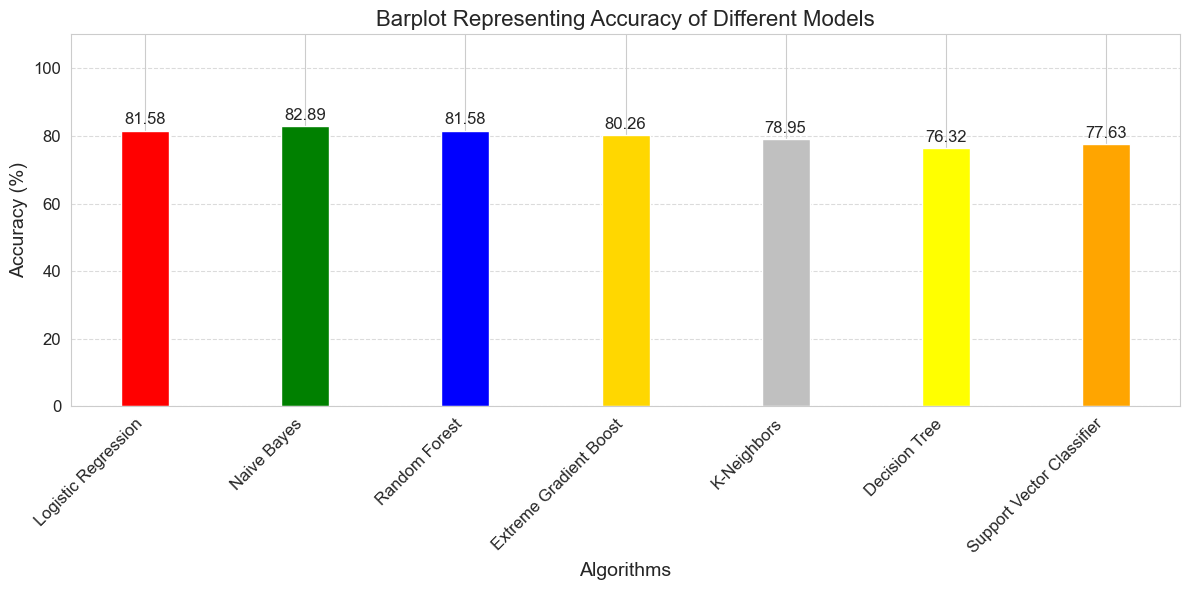

In [164]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les couleurs pour chaque barre
colors = ['red', 'green', 'blue', 'gold', 'silver', 'yellow', 'orange']

# Configurer la figure et ses dimensions
plt.figure(figsize=(12, 6))
plt.title("Barplot Representing Accuracy of Different Models", fontsize=16)
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)

# Utiliser le DataFrame 'results' et les colonnes 'Model' et 'Accuracy_score'
bar_width = 0.3  # Largeur des barres (réduite pour plus d'espace)
x = np.arange(len(results))  # Positions des barres

# Créer le barplot
bars = plt.bar(x, results['Accuracy_score'] * 100, color=colors, width=bar_width)

# Ajouter des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Personnaliser les axes
plt.xticks(x, results['Model'], fontsize=12, rotation=45, ha='right')  # Rotation des étiquettes
plt.yticks(fontsize=12)
plt.ylim(0, 110)  # Limite de l'axe y pour mieux voir les valeurs

# Afficher le graphique
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille pour les barres
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()




## Ensembling
In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [165]:
from mlxtend.classifier import StackingCVClassifier

scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[32  8]
 [ 8 28]]


Accuracy of StackingCVClassifier: 78.94736842105263 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        40
           1       0.78      0.78      0.78        36

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

